# Human Activity Recognition with Smartphones
Recognition of human activity is an ability to interpret the gestures or movements of the human body via sensors and to determine human activity or action. Most everyday human tasks can be simplified or automated if they can be recognized through the activity recognizing systems.It is important in various contexts such as safety, surveillance, healthcare and human-machine intervention.

### Importing Libraries
Now let's start our task by importing the necessary python libraries 

In [39]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

I import NumPy and pandas to manage tables and datasets. Then matplotlib is included to be used to create visualizations. To use various machine learning algorithms, I import SVM, Logistic Regression, K Nearest Neighbors Classifier, and Random Forest Classifier provided by Scikit-Learn. Also, accuracy_score is included to calculate the accuracy of the Activity Recognition Model.

Now let’s import the smartphone data and have a look at the first five rows from the dataset

In [40]:
dataset_url = 'https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones'
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in ".\human-activity-recognition-with-smartphones" (use force=True to force download)


In [41]:
data_dir = './human-activity-recognition-with-smartphones'

In [42]:
import os
os.listdir(data_dir)

['test.csv', 'train.csv']

In [43]:
training_data = pd.read_csv(data_dir + "/train.csv")
testing_data = pd.read_csv(data_dir + '/test.csv')
training_data.head()


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [44]:
training_data.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

There are a total of 7352 records in the training dataset. Also, there are no null values in the dataset. The test dataset contains 2947 records to test our models. This dataset does not have null values.

I can see that the dataset consists of accelerometer and gyro sensor values for each record. In addition, the last two columns are the subject which refers to the subject number and the activity which defines the type of activity. The Activity column will be represented by the label y and all other columns will be represented by X

In [45]:
# Get X and y for training data
X_train = training_data.drop(columns = ['Activity', 'subject'])
y_train = training_data["Activity"]

# Get X and y for testing data
y_test = testing_data['Activity']
X_test = testing_data.drop(columns = ['Activity', 'subject'])

### Data Visualization
Now let’s visualize the data to understand some hidden features of the dataset:

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

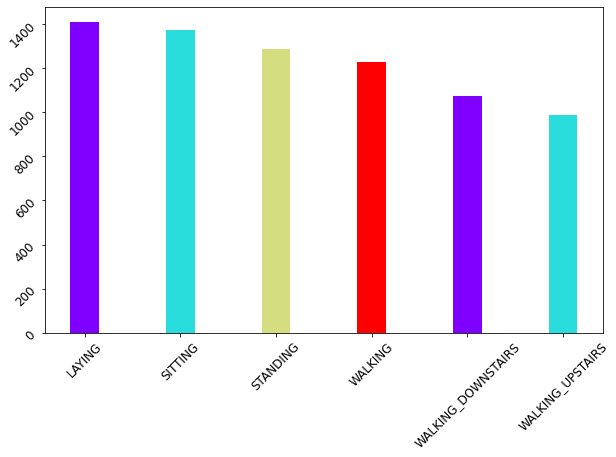

In [46]:
count_of_each_activity = np.array(y_train.value_counts())
activities = sorted(y_train.unique())
colors = cm.rainbow(np.linspace(0, 1, 4))
plt.figure(figsize=(10,6))
plt.bar(activities,count_of_each_activity,width=0.3,color=colors)
plt.xticks(rotation=45,fontsize=12)
plt.yticks(rotation=45,fontsize=12)

([<matplotlib.patches.Wedge at 0x20c366aa1c0>,
 [Text(0.9071064061014833, 0.6222201925441275, 'LAYING'),
  Text(-0.23874635466468208, 1.073778458591122, 'SITTING'),
  Text(-1.0745883152841482, 0.2350743555872831, 'STANDING'),
  Text(-0.7193129027755119, -0.832219290752544, 'WALKING'),
  Text(0.29301586483507763, -1.0602554894717366, 'WALKING_DOWNSTAIRS'),
  Text(1.0038008332903794, -0.4498709671511826, 'WALKING_UPSTAIRS')],
 [Text(0.4947853124189908, 0.3393928322967968, '19.14'),
  Text(-0.13022528436255384, 0.5856973410497028, '18.69'),
  Text(-0.5861390810640807, 0.12822237577488166, '17.49'),
  Text(-0.3923524924230064, -0.453937794955933, '16.68'),
  Text(0.15982683536458778, -0.5783211760754926, '14.59'),
  Text(0.5475277272492978, -0.24538416390064502, '13.41')])

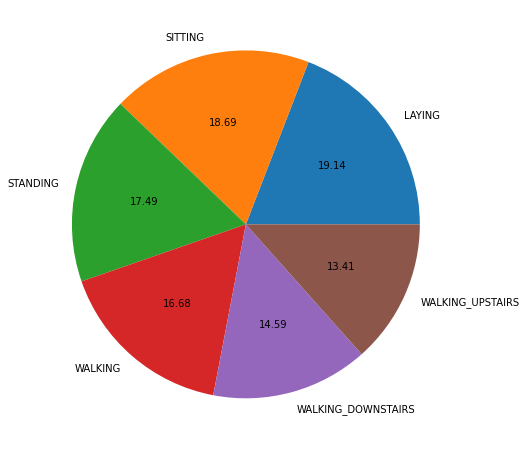

In [47]:
plt.figure(figsize=(16,8))
plt.pie(count_of_each_activity, labels = activities, autopct = '%0.2f')

The percentage of values shows that the size of the data for each activity is comparable. The dataset is also distributed. By inspecting the dataset, I can see that there are a lot of features.

It is easy to identify that there is an accelerometer, gyroscope, and other values in the data set. I can check everyone’s share by plotting a bar graph of each type. Accelerometer values have Acc in them, Gyroscope values have Gyro, and rest can be considered like others.

<BarContainer object of 3 artists>

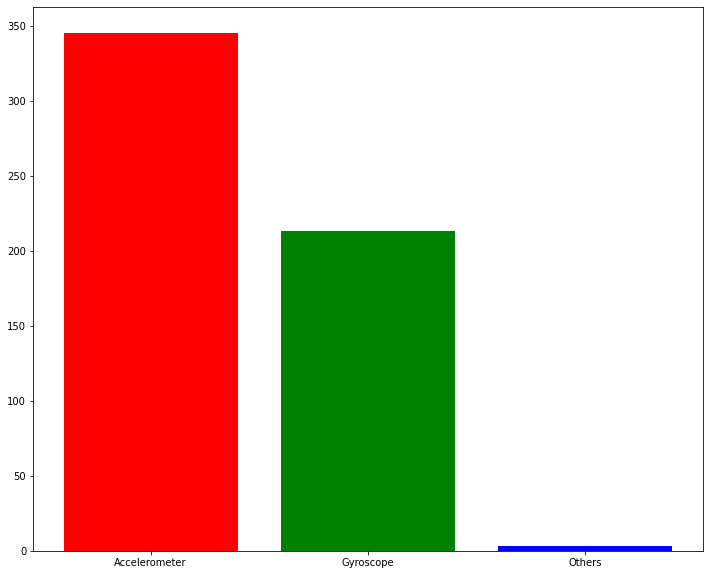

In [48]:
Acc = 0
Gyro = 0
other = 0

for value in X_train.columns:
    if "Acc" in str(value):
        Acc += 1
    elif "Gyro" in str(value):
        Gyro += 1
    else:
        other += 1
        
plt.figure(figsize=(12,10))
plt.bar(['Accelerometer', 'Gyroscope', 'Others'],[Acc,Gyro,other],color=('r','g','b'))

We can observe that the Acceleromter is providing maximum functionality, followed by gyroscope but the other features are much less.

### Human Activity Recognition Model with Python:
Now I will train machine learning models for the task of recognizing human activity. Here I will be using various machine learning algorithms available in the Scikit-Learn library in Python that I have already imported. For each algorithm, I’ll calculate the accuracy of the prediction and identify the most accurate algorithm.

In [49]:
accuracy_scores = np.zeros(4)

1. Support Vector Machine

In [50]:
clf = SVC().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[0] = accuracy_score(y_test, prediction)*100
print('Support Vector Classifier accuracy: {}%'.format(accuracy_scores[0]))


Support Vector Classifier accuracy: 95.04580929759076%


2. Logistic regression 

In [51]:
clf = LogisticRegression().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[1] = accuracy_score(y_test, prediction)*100
print('Logistic Regression accuracy: {}%'.format(accuracy_scores[1]))


Logistic Regression accuracy: 95.79233118425518%


c:\users\pragathi sree\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


3. K Nearest Neighbors Classifier

In [52]:
clf = KNeighborsClassifier().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[2] = accuracy_score(y_test, prediction)*100
print('K Nearest Neighbors Classifier accuracy: {}%'.format(accuracy_scores[2]))


K Nearest Neighbors Classifier accuracy: 90.02375296912113%


4. Random Forest classifier

In [53]:
clf = RandomForestClassifier().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[3] = accuracy_score(y_test, prediction)*100
print('Random Forest Classifier accuracy: {}%'.format(accuracy_scores[3]))


Random Forest Classifier accuracy: 92.26331862911435%


We got the highest accuracy of 95.79% with Logistic Regression model than compared to SVM, K Nearest Neighbors, Random Forest models. 

Now lets show the above algorithms results in a bar graph.

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

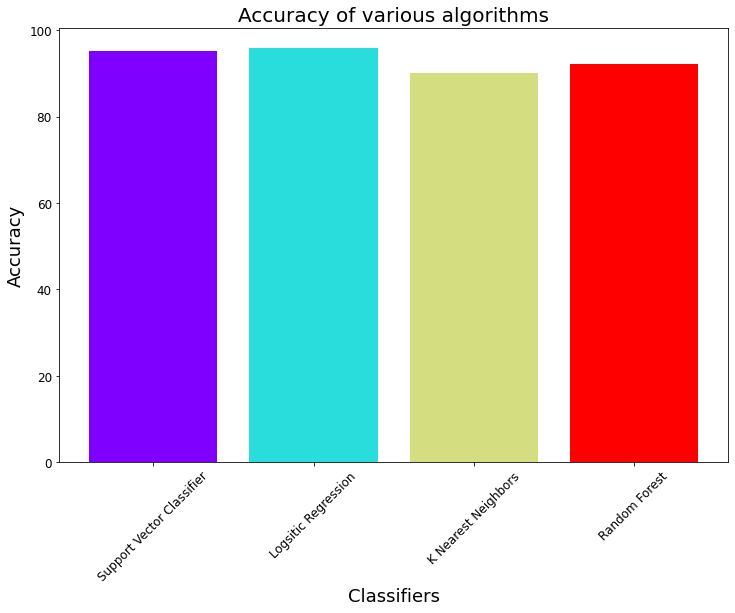

In [54]:
plt.figure(figsize=(12,8))
colors = cm.rainbow(np.linspace(0, 1, 4))
labels = ['Support Vector Classifier', 'Logsitic Regression', 'K Nearest Neighbors', 'Random Forest']
plt.bar(labels,
        accuracy_scores,
        color = colors)
plt.xlabel('Classifiers',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.title('Accuracy of various algorithms',fontsize=20)
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12)

So we can clearly see in  the graph that the Logistic Regression model performs the best for the task of Human Activity Recognition with Machine Learning. 

